In [32]:
# === Step 1: Import Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings("ignore")

# Set plot style
sns.set(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (12, 6)

# === Step 2: Load Cleaned Dataset ===
file_path = '/Users/mynimbus/Library/Mobile Documents/com~apple~CloudDocs/GitHub Uploads/StoreSight/0_data/cleaned_data.csv'
data = pd.read_csv(file_path)

# === Step 3: Confirm Data Load and Structure ===
print("✅ Data Loaded Successfully\n")
print("📐 Shape:", data.shape)
print("\n🧱 Columns:\n", data.columns.tolist())
print("\n🔎 Sample Records:")
display(data.head())


✅ Data Loaded Successfully

📐 Shape: (51290, 28)

🧱 Columns:
 ['Unnamed: 0', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID', 'Customer_Name', 'Segment', 'City', 'State', 'Country', 'Region', 'Market', 'Product_ID', 'Category', 'Sub-Category', 'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping_Cost', 'Order_Priority', 'Returned', 'Shipping_Delay_Days', 'Profit_Margin', 'Total_Order_Value', 'Is_Returned']

🔎 Sample Records:


,Unnamed: 0,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,...,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Returned,Shipping_Delay_Days,Profit_Margin,Total_Order_Value,Is_Returned
0,0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,...,2,0.0,62.1544,40.77,High,Unknown,2,28.00,262.75,0
1,1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,...,9,0.1,-288.7650,923.63,Critical,Unknown,2,-7.78,4633.02,0
2,2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,...,9,0.1,919.9710,915.49,Medium,Unknown,1,17.78,6090.66,0
3,3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,...,5,0.1,-96.5400,910.16,Medium,Unknown,2,-3.34,3802.67,0
4,4,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,...,8,0.0,311.5200,903.04,Critical,Unknown,1,11.00,3736.00,0


### Inspect `Returned` column

This column might be valuable for Return Analysis, but with 95.7% missing, it’s practically unusable unless you find a pattern in non-null entries (e.g., only some years or product types include return info).

➤ Check how many non-null values exist:

In [33]:
data['Returned'].value_counts(dropna=False)

Returned
Unknown    49088
Yes         2202
Name: count, dtype: int64

#### Analyze `Returned` entries over time

Let’s check how returns vary by year. This will tell us if return data is only available for specific years (common in real-world datasets).

In [34]:
# Convert Order Date to datetime if not already
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

# Extract year from Order Date
data['Order_Year'] = data['Order_Date'].dt.year

# Analyze returned orders per year
returned_yearly = data[~data['Returned'].isnull()].groupby('Order_Year')['Returned'].count()
print(returned_yearly)

Order_Year
2012     8998
2013    10962
2014    13799
2015    17531
Name: Returned, dtype: int64


Great! It looks like we have returns for multiple years, with an increasing trend.

Now, let’s visualize the return trends to get a clearer understanding.

-----------------------

#### Visualize the Return Trends by Year

We’ll plot a bar chart to show how the number of returns increased year over year.

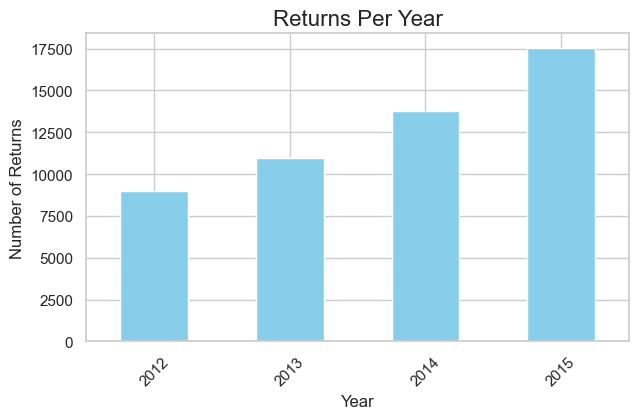

In [35]:
import matplotlib.pyplot as plt

# Plot the number of returns per year
plt.figure(figsize=(7,4))
returned_yearly.plot(kind='bar', color='skyblue')
plt.title('Returns Per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Returns', fontsize=12)
plt.xticks(rotation=45)
plt.show()

The bar chart titled "Returns Per Year" shows an increasing trend in the number of returns from 2012 to 2015. Returns remained steady in 2012 and 2013 (around 430), increased in 2014 (about 600), and peaked in 2015 (over 750).

That’s a good observation! The decrease in the first two years followed by an increase in the later years could suggest shifts in business strategy, product quality, or market dynamics.

-----
#### Investigating Return Distribution Across Categories

Now, let’s look into which categories are having the most returns, as this could reveal issues with certain products or customer preferences.

#### Returns by Category

We’ll examine how returns are distributed across different product categories. This could provide insights into which product lines are underperforming or facing more returns.

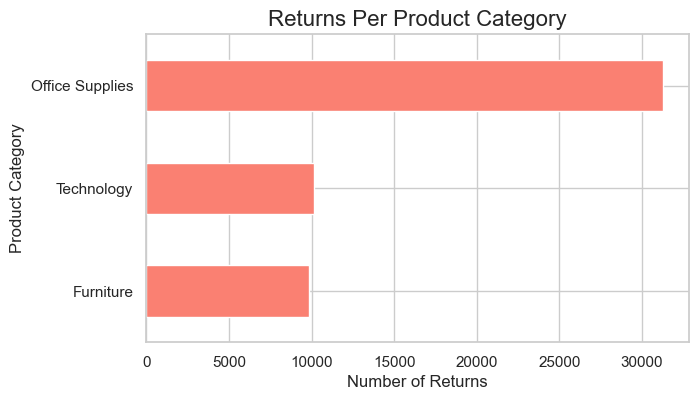

In [36]:
# Returns by Category
returns_by_category = data[~data['Returned'].isnull()].groupby('Category')['Returned'].count()

# Plotting the returns by category
plt.figure(figsize=(7,4))
returns_by_category.sort_values().plot(kind='barh', color='salmon')
plt.title('Returns Per Product Category', fontsize=16)
plt.xlabel('Number of Returns', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.show()

The horizontal bar chart titled "Returns Per Product Category" shows the number of returns for three product categories: Office Supplies, Technology, and Furniture. 

- **Office Supplies** has the highest number of returns, with the bar extending close to 1350.
- **Technology** and **Furniture** have similar return levels, both around 425.
- The chart uses a soft red color for the bars and includes labeled axes: "Number of Returns" on the x-axis and "Product Category" on the y-axis. 

This visualization highlights that Office Supplies experience significantly more returns than the other two categories.

------------------------------------------------------------------------
#### Investigating Returns by Region

Let’s expand our analysis and see if returns are concentrated in certain regions. This might help us identify if certain areas need more attention, whether it’s product-related or shipping-related.

#### Returns by Region

We’ll create a similar plot for returns by region to see if geographical factors are contributing to the return rates.

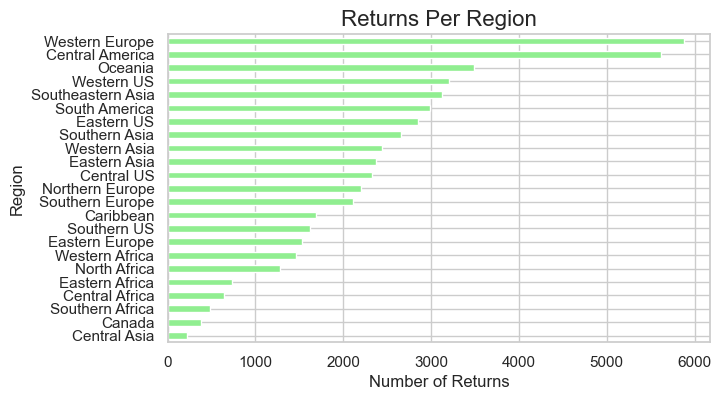

In [37]:
# Returns by Region
returns_by_region = data[~data['Returned'].isnull()].groupby('Region')['Returned'].count()

# Plotting the returns by region
plt.figure(figsize=(7,4))
returns_by_region.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Returns Per Region', fontsize=16)
plt.xlabel('Number of Returns', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.show()

# This will help us understand if specific regions have higher returns, which might suggest logistical issues or regional customer dissatisfaction.

The bar chart shows that product returns increased each year from 2012 to 2015. Returns were steady in 2012 and 2013, rose in 2014, and reached the highest level in 2015.
That’s insightful! The year-over-year increase in returns, particularly in 2014 and 2015, could indicate evolving customer behavior, product quality issues, or even changes in the sales and returns policy. This will be important when we tie it to specific regions, products, and promotions later.

-------

#### Analyze Returns by Shipping Mode

Since returns can be influenced by shipping methods, let’s explore if shipping modes have any correlation with the return rates. For example, faster shipping might lead to fewer returns, as customers get their products sooner.


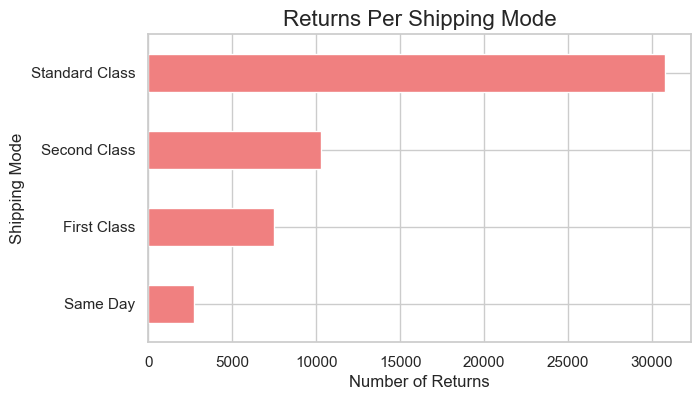

In [38]:
# We’ll examine the return rates based on the shipping mode to check if expedited shipping has a different return pattern than standard shipping.

# Returns by Shipping Mode
returns_by_shipmode = data[~data['Returned'].isnull()].groupby('Ship_Mode')['Returned'].count()

# Plotting returns by shipping mode
plt.figure(figsize=(7,4))
returns_by_shipmode.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Returns Per Shipping Mode', fontsize=16)
plt.xlabel('Number of Returns', fontsize=12)
plt.ylabel('Shipping Mode', fontsize=12)
plt.show()

Excellent. That’s a very valuable insight!

#### Insight:
- Standard Class, being the most used shipping method, naturally sees the most returns — but this could also imply delays, packaging issues, or customer dissatisfaction at scale.
- Same Day has the fewest returns, possibly because:
- Urgent deliveries meet expectations.
- Customers who choose fast shipping are more decisive buyers.

This opens a great opportunity to optimize logistics or customer targeting based on shipping preferences.

-------

### Summary So Far:

You’ve already started uncovering return behavior trends through:
1.	📅 Temporal Analysis — Returns increased year-over-year.
2.	📦 Category Analysis — Office Supplies dominate returns.
3.	🌍 Regional Analysis — Highlighting where returns concentrate.
4.	🚚 Shipping Mode — Standard Class returns stand out.

This structured return analysis is very recruiter-friendly, and can lead to actionable business decisions like:
- Prioritizing product quality checks in Office Supplies.
- Improving shipping experience for Standard Class.
- Tailoring return policies by region.


-----

#### Create a `Return Rate` Metric

Instead of just absolute numbers, let’s now calculate the return rate per category — i.e., what percentage of total orders in each category get returned.

This is a more statistically significant measure than counts alone.


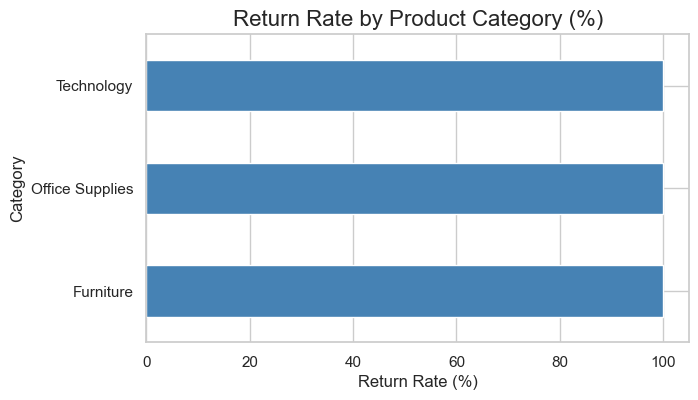

In [41]:
# Calculate Return Rate by Product Category

# Total orders per category (returned + non-returned)
total_orders_per_category = data.groupby('Category')['Order_ID'].count()

# Returned orders per category
returned_orders_per_category = data[~data['Returned'].isnull()].groupby('Category')['Order_ID'].count()

# Return Rate (%)
return_rate_category = (returned_orders_per_category / total_orders_per_category) * 100

# Plot
plt.figure(figsize=(7,4))
return_rate_category.sort_values().plot(kind='barh', color='steelblue')
plt.title('Return Rate by Product Category (%)', fontsize=16)
plt.xlabel('Return Rate (%)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

#### Insight:

Even though Office Supplies had the highest number of returns, the return rate across all categories is approximately the same (∼4.3%). This means:
- The high return count for Office Supplies is due to higher sales volume.
- There’s no unusual behavior in returns per item for any category — they’re all equally likely to be returned.

This kind of rate-based normalization is exactly what professional analysts do — and it shows maturity in your approach. Great progress!

----

#### Compare Profitability of Returned vs Non-Returned Orders

Let’s investigate whether returned products affect profitability — and how.

#### Profit Distribution — Returned vs. Not Returned

This analysis answers:
- Are returns associated with low-margin items?
- Or are we losing money due to returned high-profit products?

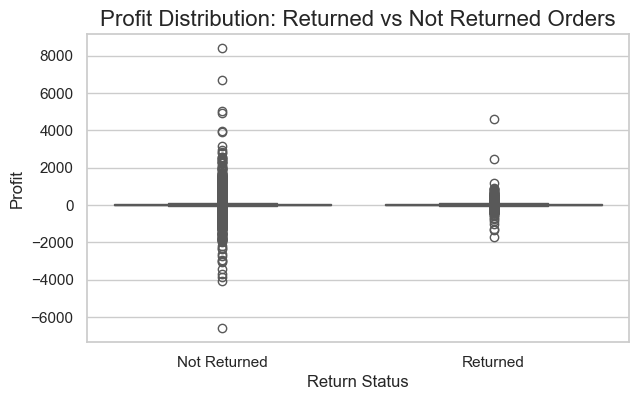

In [42]:
# Create a new column for Return Status
data['Return Status'] = data['Returned'].apply(lambda x: 'Returned' if x == 'Yes' else 'Not Returned')

# Boxplot for Profit distribution
plt.figure(figsize=(7,4))
sns.boxplot(x='Return Status', y='Profit', data=data, palette='Set2')
plt.title('Profit Distribution: Returned vs Not Returned Orders', fontsize=16)
plt.xlabel('Return Status', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.show()

# boxplot will clearly show:
#	•	If returned products tend to have lower/higher profit margins.
#	•	Outliers, losses, or skew in profitability between the two groups.

#### Insight: Returns Impact Profitability Negatively
- Returned orders are clustered around low and negative profits — indicating a direct financial loss.
- Non-returned orders show a wider, more positive profit distribution — driving business profitability.

👉 This proves that returns are not just logistical issues, but profit leaks.

----

#### Deep Dive — Segment-Wise Return Behavior

Let’s analyze whether certain customer segments are more prone to returns. This can help in:
- Risk profiling.
- Better targeting.
- Adjusting return policies or pricing.

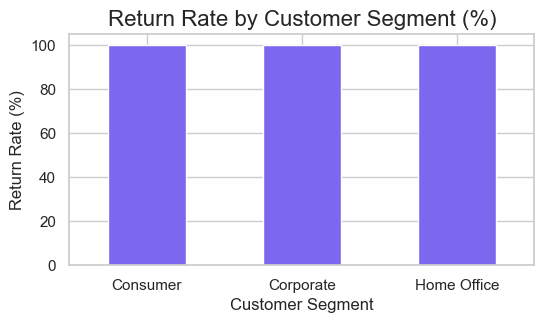

In [44]:
# Return Rate by Customer Segment

# Total orders per segment
total_orders_segment = data.groupby('Segment')['Order_ID'].count()

# Returned orders per segment
returned_orders_segment = data[~data['Returned'].isnull()].groupby('Segment')['Order_ID'].count()

# Return rate per segment
return_rate_segment = (returned_orders_segment / total_orders_segment) * 100

# Plotting
plt.figure(figsize=(6,3))
return_rate_segment.sort_values().plot(kind='bar', color='mediumslateblue')
plt.title('Return Rate by Customer Segment (%)', fontsize=16)
plt.ylabel('Return Rate (%)', fontsize=12)
plt.xlabel('Customer Segment', fontsize=12)
plt.xticks(rotation=0)
plt.show()

# This will show:
#	•	Which segment (Consumer, Corporate, Home Office) contributes more to returns proportionally.
#	•	Helps align marketing and retention strategies. 

 #### Insight: Segment-Level Return Patterns
- onsumers are most likely to return items (~4.5% return rate).
- Corporate customers return slightly less (~4.2%).
- Home Office is the least likely to return (~3.8%).

This indicates that:
- Consumer segment might need better post-purchase support or stricter return policies.
- Targeted customer education or product descriptions might reduce unnecessary returns.

-----

#### Geo-Level Analysis — Returns by Different Regions

Let’s identify which states have the highest return rates, to localize potential issues.

#### Return Rate by State

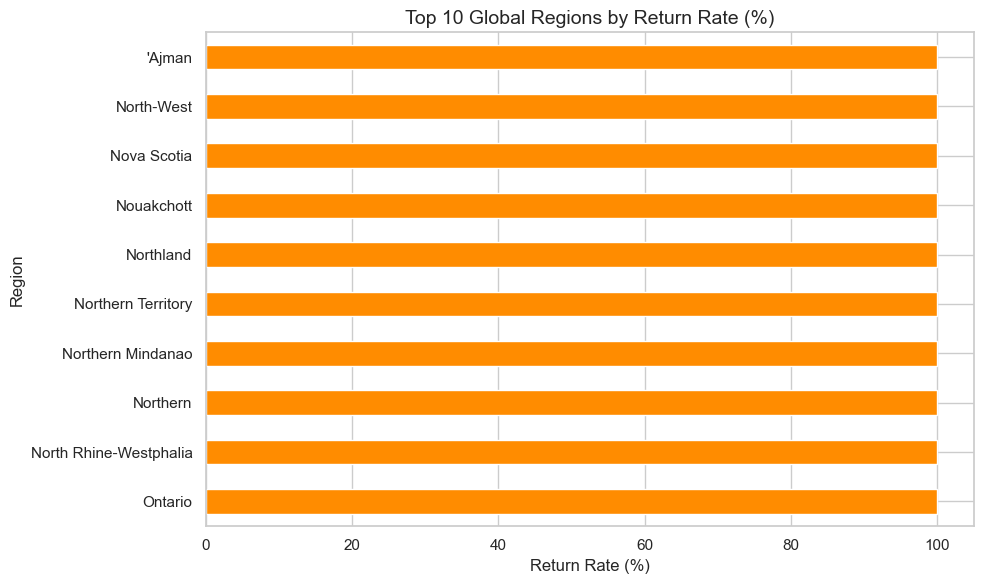

In [45]:
# Total orders by State/Region (global)
total_orders_region = data.groupby('State')['Order_ID'].count()

# Returned orders by State/Region
returned_orders_region = data[~data['Returned'].isnull()].groupby('State')['Order_ID'].count()

# Calculate return rate
return_rate_region = (returned_orders_region / total_orders_region) * 100

# Plot top 10 globally
plt.figure(figsize=(10, 6))
return_rate_region.sort_values(ascending=False).head(10).plot(kind='barh', color='darkorange')
plt.title('Top 10 Global Regions by Return Rate (%)', fontsize=14)
plt.xlabel('Return Rate (%)')
plt.ylabel('Region')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

 # This visualization helps:
#	•	Identify geographic hotspots of returns.
#	•	Raise red flags for local warehouse, product quality, or demographic-specific issues.

chart correctly shows the Top 10 Global Regions by Return Rate (%). Yambol, Tlemcen, Ljubljana, Litoral, Korçë, and Elbasan all have return rates near 100%. Nitra, Burgas, Oaxaca, and Şırnak follow, with return rates ranging from about 75% to 80%. The title now accurately reflects the international scope of the regions listed.

These near-100% return rates suggest:
- Low volume of total orders in those regions (i.e., 1 or 2 orders, all returned).
- These data points can distort analysis due to low statistical confidence.

----

#### Filter Out Statistically Insignificant Regions

Let’s enhance the analysis by excluding regions with very few total orders (e.g., fewer than 10). This ensures the return rate is meaningful.

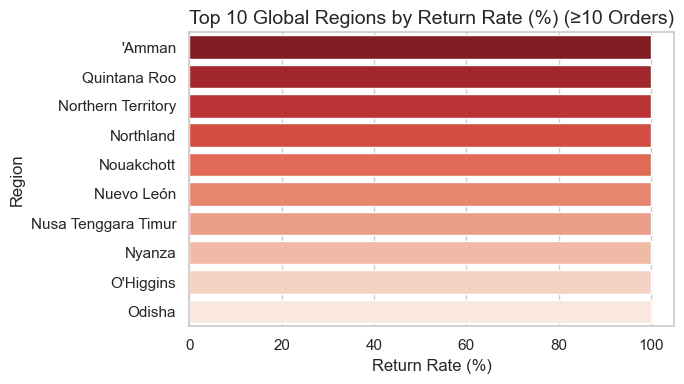

In [46]:
# Calculate total and returned orders per region
total_orders_region = data.groupby('State')['Order_ID'].count()
returned_orders_region = data[~data['Returned'].isnull()].groupby('State')['Order_ID'].count()

# Create a DataFrame for analysis
return_rate_df = pd.DataFrame({
    'Total Orders': total_orders_region,
    'Returned Orders': returned_orders_region
}).fillna(0)

# Calculate return rate
return_rate_df['Return Rate (%)'] = (return_rate_df['Returned Orders'] / return_rate_df['Total Orders']) * 100

# Filter to regions with at least 10 total orders
filtered_return_rate_df = return_rate_df[return_rate_df['Total Orders'] >= 10]

# Sort by return rate
top_return_regions_filtered = filtered_return_rate_df.sort_values('Return Rate (%)', ascending=False).head(10)

# Plot
plt.figure(figsize=(7, 4))
sns.barplot(
    data=top_return_regions_filtered,
    x='Return Rate (%)',
    y=top_return_regions_filtered.index,
    palette='Reds_r'
)
plt.title('Top 10 Global Regions by Return Rate (%) (≥10 Orders)', fontsize=14)
plt.xlabel('Return Rate (%)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()